# Ten Day Stock Calculation

In [51]:
# IMPORT FOR yfinance, SEEMS TO TAKE COMPUTING POWER

import yfinance as yf

In [111]:
# OTHER IMPORTS

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# import matplotlib as plt
# %matplotlib inline
import matplotlib.pyplot as plt 

In [67]:
# ESTABLISH TODAY 

today = datetime.today()
now = today.strftime("%Y-%m-%d")

In [68]:
# LOOP THROUGH DAYS AND ADD BUSINESS DAYS TO bussiness_day_array; IF IT IS A WEEKEND, DO NOT ADD TO ARRAY

business_day_array = []
temporary_today = today

while len(business_day_array) < 10:
    day_before = temporary_today - timedelta(days=1)
    day_name = str(day_before.strftime("%A"))
    if day_name == "Saturday" or day_name == "Sunday":
        temporary_today = day_before
        continue
    else:
        business_day_array.append(day_before.strftime("%Y-%m-%d"))
        temporary_today = day_before

In [84]:
# ESTABLISH START DATE AND END DATE TO CREATE STOCK DATA RANGE; ADD STOCK TICKER SYMBOL

# start_date = business_day_array[-1]
start_date = "2022-12-14"
end_date = today.strftime("%Y-%m-%d")
ticker = 'GOOGL'

In [85]:
data = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [86]:
# SHOW CLOSING PRICES

closing_prices = data['Close']
closing_prices

Date
2022-12-14    95.070000
2022-12-15    90.860001
2022-12-16    90.260002
2022-12-19    88.440002
2022-12-20    89.019997
2022-12-21    89.580002
2022-12-22    87.760002
2022-12-23    89.230003
2022-12-27    87.389999
2022-12-28    86.019997
Name: Close, dtype: float64

In [107]:
# CALCULATE THE TEN DAY MOVING AVERAGE

ten_day_average = closing_prices.mean()

Text(2022-12-29 09:32:59.189766, 89.36300048828124, '89.36300048828124')

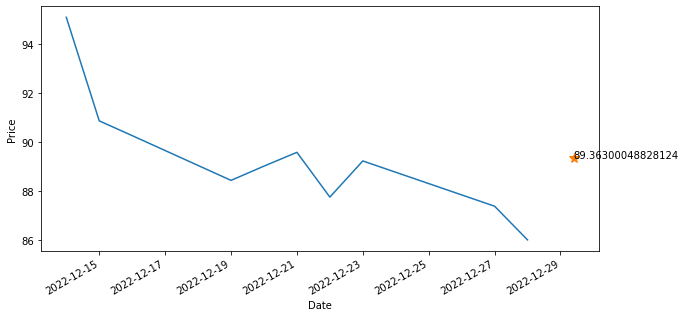

In [129]:
# PLOT CLOSING DATA AND ADD TEN DAY AVERAGE TO CHART

closing_prices.plot(xlabel="Date", ylabel="Price",figsize=(10, 5))
plt.plot([today], [ten_day_average], marker='*', ls='none', ms=10)
plt.text(today, ten_day_average, str(ten_day_average))

['2022-12-29', 89.36300048828124]